# Варченко Кирилл, Модульная домашняя работа №2, анализ данных

**Вариант 1**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

In [11]:
data = pd.read_csv('MHW2_data/215931745_102011_1126_airline_delay_causes.csv', usecols=range(21))

## Общий осмотр и описательные статистики

In [17]:
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,date_decimal
0,2003,6,AA,American Airlines Inc.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",307.0,56.0,14.68,10.79,...,9.96,1.0,1.0,2530.0,510.0,621.0,676.0,25.0,698.0,2003.500000
1,2003,6,AA,American Airlines Inc.,ANC,"Anchorage, AK: Ted Stevens Anchorage Internati...",90.0,27.0,7.09,2.00,...,7.16,0.0,0.0,1390.0,271.0,83.0,581.0,0.0,455.0,2003.500000
2,2003,6,AA,American Airlines Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",752.0,186.0,33.99,27.82,...,17.53,5.0,0.0,8314.0,1367.0,1722.0,3817.0,139.0,1269.0,2003.500000
3,2003,6,AA,American Airlines Inc.,AUS,"Austin, TX: Austin - Bergstrom International",842.0,174.0,60.24,20.54,...,40.75,9.0,1.0,8344.0,3040.0,1032.0,1835.0,115.0,2322.0,2003.500000
4,2003,6,AA,American Airlines Inc.,BDL,"Hartford, CT: Bradley International",383.0,55.0,14.90,8.91,...,16.61,0.0,0.0,3137.0,815.0,574.0,555.0,0.0,1193.0,2003.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147295,2011,10,YV,Mesa Airlines Inc.,SRQ,"Sarasota/Bradenton, FL: Sarasota/Bradenton Int...",2.0,0.0,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.833333
147296,2011,10,YV,Mesa Airlines Inc.,STL,"St. Louis, MO: Lambert-St. Louis International",42.0,5.0,2.97,0.00,...,0.00,0.0,0.0,190.0,151.0,0.0,39.0,0.0,0.0,2011.833333
147297,2011,10,YV,Mesa Airlines Inc.,SYR,"Syracuse, NY: Syracuse Hancock International",46.0,7.0,4.40,0.00,...,1.90,0.0,0.0,372.0,283.0,0.0,18.0,0.0,71.0,2011.833333
147298,2011,10,YV,Mesa Airlines Inc.,TUS,"Tucson, AZ: Tucson International",275.0,22.0,13.26,2.00,...,3.76,1.0,0.0,1400.0,1054.0,70.0,64.0,0.0,212.0,2011.833333


In [18]:
# Данных много, поэтому можно дропнуть НА
data.dropna(inplace=True)

In [26]:
# Время в мин на каждый задержанный рейс
data['delay_per_del15'] = data[' arr_delay'] / data['arr_del15']
# Доля задержанных рейсов от всех
data['del15_per_flight'] = data['arr_del15'] / data['arr_flights']

## Частоты по категориальным переменным


## Описательные статистики

In [27]:
data[['delay_per_del15', 'del15_per_flight']].describe()

,delay_per_del15,del15_per_flight
count,144559.000000,147028.000000
mean,50.791776,0.219051
std,16.682019,0.112758
min,15.000000,0.000000
25%,40.552506,0.142857
50%,49.000000,0.205882
75%,58.666667,0.280702
max,710.000000,1.000000


## Гистрограммы и скаттерплоты

<AxesSubplot:xlabel='del15_per_flight', ylabel='Count'>

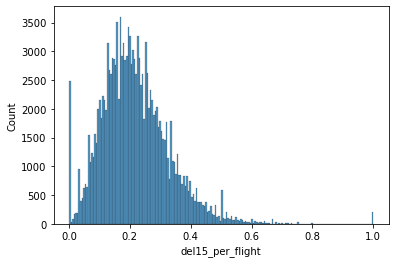

In [28]:
# Доля задержанных рейсов от всех
sns.histplot(data=data, x='del15_per_flight')

<AxesSubplot:xlabel='delay_per_del15', ylabel='Count'>

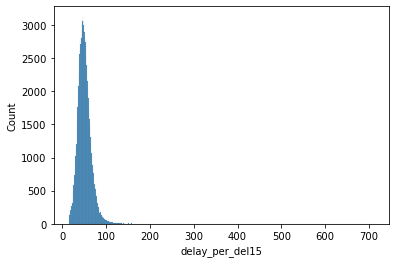

In [29]:
# Время в мин на каждый задержанный рейс
sns.histplot(data=data, x='delay_per_del15')

<AxesSubplot:xlabel='carrier', ylabel='del15_per_flight'>

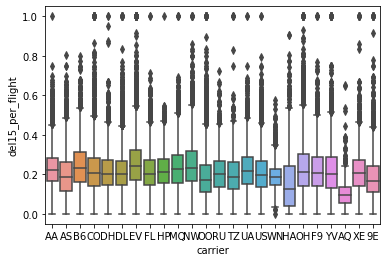

In [34]:
# Боксплот доли задержанных вылетов по авиакомпаниям
sns.boxplot(data=data, y='del15_per_flight', x='carrier')

<AxesSubplot:xlabel='carrier', ylabel='delay_per_del15'>

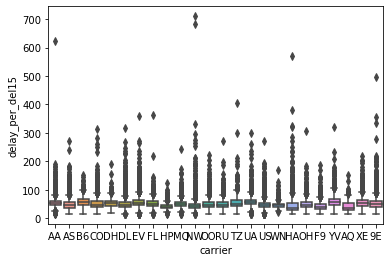

In [35]:
# Боксплот время зажержки на вылет по авиакомпаниям
sns.boxplot(data=data, y='delay_per_del15', x='carrier')

## Гипотеза

Проверим гипотезу о том, что средняя доля задержанных вылетов одинаковая для всех авиаперевозчиков. Для этого воспользуемся парным непараметрическим тестом (Манна-Уитни) с поправкой Бонферрони.

In [63]:
res = pg.pairwise_ttests(data=data, dv='del15_per_flight', between='carrier', padjust='bonf', parametric=False)

In [64]:
res

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,p-corr,p-adjust,hedges
0,carrier,9E,AA,False,False,15698353.5,two-sided,5.853631e-211,1.615602e-208,bonf,-0.458068
1,carrier,9E,AQ,False,False,1049122.5,two-sided,4.931090e-37,1.360981e-34,bonf,0.626677
2,carrier,9E,AS,False,False,12081170.5,two-sided,4.500069e-17,1.242019e-14,bonf,-0.157499
3,carrier,9E,B6,False,False,7443349.0,two-sided,6.607542e-164,1.823682e-161,bonf,-0.525796
4,carrier,9E,CO,False,False,15318989.5,two-sided,4.777080e-82,1.318474e-79,bonf,-0.299933
...,...,...,...,...,...,...,...,...,...,...,...
271,carrier,US,XE,False,False,25535079.5,two-sided,2.462417e-03,6.796272e-01,bonf,0.002791
272,carrier,US,YV,False,False,26918078.0,two-sided,3.123039e-02,1.000000e+00,bonf,-0.043248
273,carrier,WN,XE,False,False,20027457.0,two-sided,4.334845e-39,1.196417e-36,bonf,-0.244152
274,carrier,WN,YV,False,False,21544695.5,two-sided,3.077879e-26,8.494945e-24,bonf,-0.260088


In [65]:
res.loc[res['p-corr'] < 0.05, ['A', 'B']]

,A,B
0,9E,AA
1,9E,AQ
2,9E,AS
3,9E,B6
4,9E,CO
...,...,...
268,UA,XE
269,UA,YV
270,US,WN
273,WN,XE


215 из 276 пар с $\alpha=0.05$ имеют разные средние доли задержанных вылетов